# Préparation du dataset

## Import du dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir,makedirs
from PIL import Image 
import random
import time
from matplotlib import pyplot
path = "C:/Users/abdel/Downloads/Images/Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))


1050


## Création des labels des photos à partir du nom des catégories des images¶

In [5]:
data = pd.read_csv('data_categories.csv')

In [6]:
l_cat = list(set(data['cat_lvl_1']))
print("categories : ", l_cat)
# y_cat_num = [(l_cat.index(data.iloc[i]['cat_lvl_1'])) for i in range(len(data))]

categories :  ['Home Furnishing', 'Beauty and Personal Care', 'Baby Care', 'Computers', 'Watches', 'Home Decor & Festive Needs', 'Kitchen & Dining']


In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data["label"] = le.fit_transform(data["cat_lvl_1"])
data[['cat_lvl_1','image','label']]

,cat_lvl_1,image,label
0,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,4
1,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,0
2,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,0
3,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,4
4,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,4
...,...,...,...
1045,Baby Care,958f54f4c46b53c8a0a9b8167d9140bc.jpg,0
1046,Baby Care,fd6cbcc22efb6b761bd564c28928483c.jpg,0
1047,Baby Care,5912e037d12774bb73a2048f35a00009.jpg,0
1048,Baby Care,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,0


## Liste des labels des photos

In [7]:
from sklearn import preprocessing

list_labels = ["Home Furnishing", "Home Decor & Festive Needs", "Computers", "Beauty and Personal Care","Kitchen & Dining","Watches","Baby Care"]

## Affichage d'exemples d'images (5 images)

009099b1f6e1e8f893ec29a7023153c4.jpg
taille de l'image =  (1162, 687, 3)


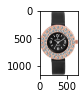

0096e89cc25a8b96fb9808716406fe94.jpg
taille de l'image =  (904, 1478, 3)


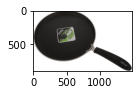

00cbbc837d340fa163d11e169fbdb952.jpg
taille de l'image =  (326, 1347, 3)


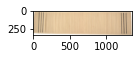

00d84a518e0550612fcfcba3b02b6255.jpg
taille de l'image =  (857, 1100, 3)


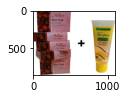

00e966a5049a262cfc72e6bbf68b80e7.jpg
taille de l'image =  (1100, 962, 3)


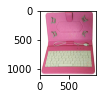

00ed03657cedbe4663eff2d7fa702a33.jpg
taille de l'image =  (2430, 788, 3)


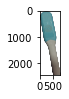

01089dc3618a0ab7304d784ef400b83d.jpg
taille de l'image =  (543, 1100, 3)


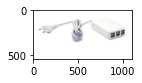

0131e5d87b72877702d536299cf83b75.jpg
taille de l'image =  (475, 512, 3)


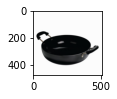

020d2daba55a723128e4e07c0b0393a9.jpg
taille de l'image =  (553, 1100, 3)


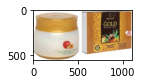

In [8]:
from matplotlib.image import imread
import cv2

Tailles_images=[]
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = path + (list_photos)[i]
    im = cv2.imread(filename)
    Tailles_images.append(im.shape)   # taille dees images
    list_image_name = [list_photos[i] for i in range(len(list_photos))]  # noms des images 
    image = imread(filename)
    pyplot.imshow(image)
    print(list_image_name [i])  
    print("taille de l'image = ", Tailles_images[i]) 
    pyplot.show()

Les images ont des dimensions différentes. 

## Détermination et affichage des descripteurs SIFT d'une image exemple :

* L'image contient un certain  nombre de descripteurs
* Chaque descripteur est un vecteur de longueur 128

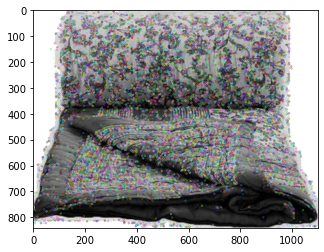

Descripteurs :  (11316, 128)

[[137.  97.  33. ...   0.   0.   0.]
 [  0.   0.  18. ...   0.   0.   0.]
 [149. 132.   0. ...   0.   0.   0.]
 ...
 [  4. 132.  33. ...   3.   4.  21.]
 [  8.   2.   0. ...   0.   0.   0.]
 [ 10.   0.   0. ...  25.  11.   2.]]


In [8]:
# Génerer un nombre aléatoire de [0:1049]
i = random.randint(0,1049)
sift = cv2.xfeatures2d.SIFT_create()
image_original = cv2.imread(path+list_photos[i]) # original image
image = cv2.imread(path+list_photos[i],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

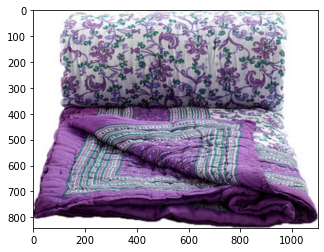

In [9]:
plt.imshow(image_original)

# Pré-traitement des images via SIFT

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [21]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create()

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    for i in range(len(data['image'])):
        if data['image'][i]==image_num:
            image_cat=data['cat_lvl_1'][i]
            image_lab=data['label'][i]
            image_category.append(image_cat)
            image_labels.append(image_lab)     
            
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)



Nombre de descripteurs :  (9051349, 128)
temps de traitement SIFT descriptor :           521.81 secondes


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [22]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  3009
Création de 3009 clusters de descripteurs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


temps de traitement kmeans :           235.36 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [23]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :           165.75 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [24]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 3009)
Dimensions dataset après réduction PCA :  (1050, 529)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [25]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = image_category # data["cat_lvl_1"]
print(df_tsne.shape)

(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images
* Les catégories sont partiellement séparées

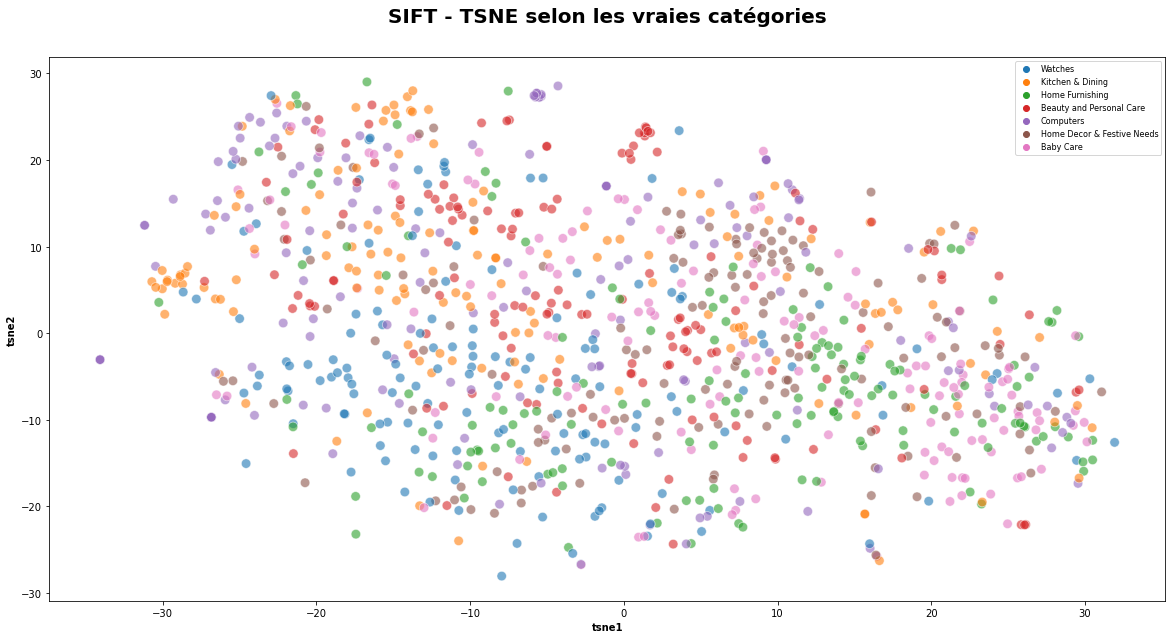

In [26]:
plt.figure(figsize=(20,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=90, alpha=0.6)

plt.title('SIFT - TSNE selon les vraies catégories', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 10, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 10, fontweight = 'bold')
plt.legend(prop={'size': 8}) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [27]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [28]:
cls.labels_

array([1, 1, 1, ..., 4, 6, 3])

###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI reste très faible

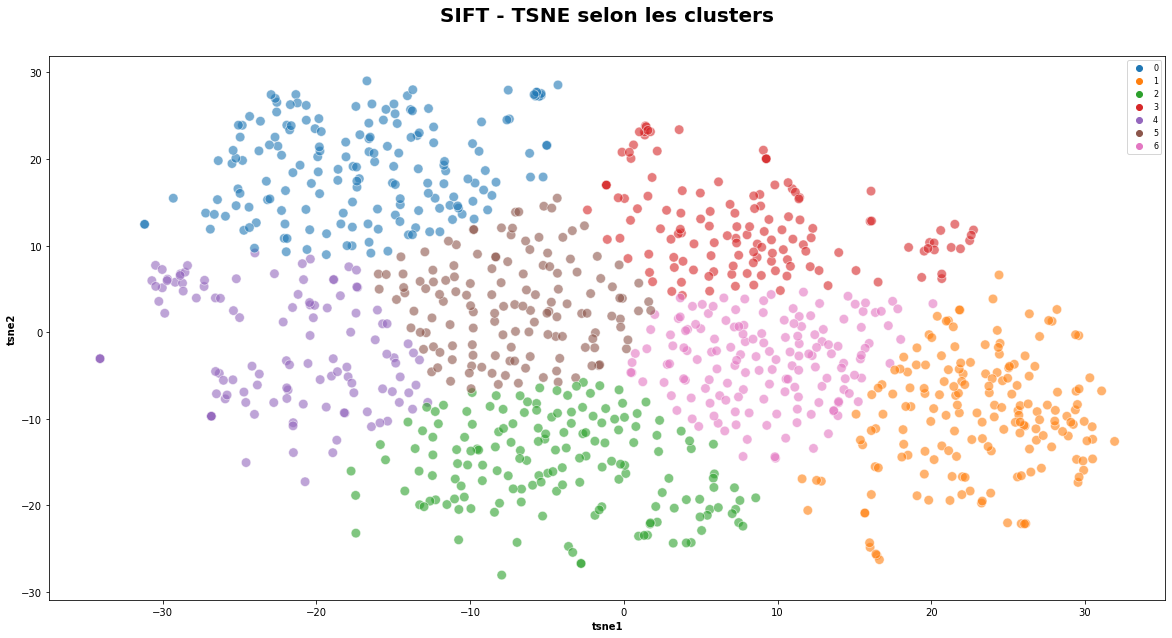

ARI :  0.04629606097584081


In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=90, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('SIFT - TSNE selon les clusters', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 10, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 10, fontweight = 'bold')
plt.legend(prop={'size': 8}) 

plt.show()

labels = image_labels # data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

# Pré-traitement des images via ORB : 

Créations des descripteurs de chaque image
Pour chaque image passage en gris et equalisation
création d'une liste de descripteurs par image ("ORB_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
création d'une liste de descripteurs pour l'ensemble des images ("ORB_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [30]:
# identification of key points and associated descriptors
import time, cv2
ORB_keypoints = []
temps1=time.time()
orb = cv2.ORB_create()

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)   
    for i in range(len(data['image'])):
        if data['image'][i]==image_num:
            image_cat=data['cat_lvl_1'][i]
            image_lab=data['label'][i]
            image_category.append(image_cat)
            image_labels.append(image_lab)
            
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = orb.detectAndCompute(res, None)
    ORB_keypoints.append(des)

ORB_keypoints_by_img = np.asarray(ORB_keypoints)
ORB_keypoints_all    = np.concatenate(ORB_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", ORB_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement ORB descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (520145, 32)
temps de traitement ORB descriptor :            33.56 secondes


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


## Création des clusters de descripteurs
Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [31]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(ORB_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(ORB_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  721
Création de 721 clusters de descripteurs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


temps de traitement kmeans :             2.32 secondes


## Création des features des images
Pour chaque image :
prédiction des numéros de cluster de chaque descripteur
création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image
Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [32]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(ORB_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             1.57 secondes


## Réductions de dimension
### Réduction de dimension PCA

La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)

L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [33]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 721)
Dimensions dataset après réduction PCA :  (1050, 415)


### Réduction de dimension T-SNE
Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [34]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = image_category # data["cat_lvl_1"]
print(df_tsne.shape)

(1050, 3)


### Analyse visuelle : affichage T-SNE selon catégories d'images
Les catégories sont partiellement séparées

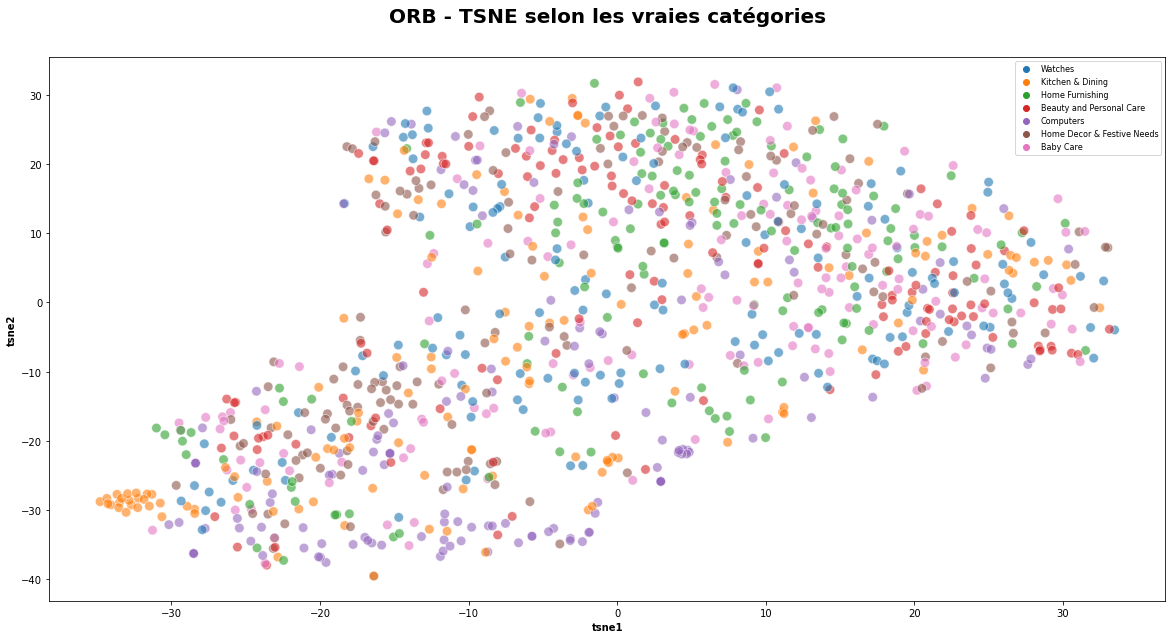

In [35]:
plt.figure(figsize=(20,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=90, alpha=0.6)

plt.title('ORB - TSNE selon les vraies catégories', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 10, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 10, fontweight = 'bold')
plt.legend(prop={'size': 8}) 

plt.show()

### Analyse mesures : similarité entre catégories et clusters
### Création de clusters à partir du T-SNE

In [36]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


### Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
Le score ARI de 0.0018 reste très faible

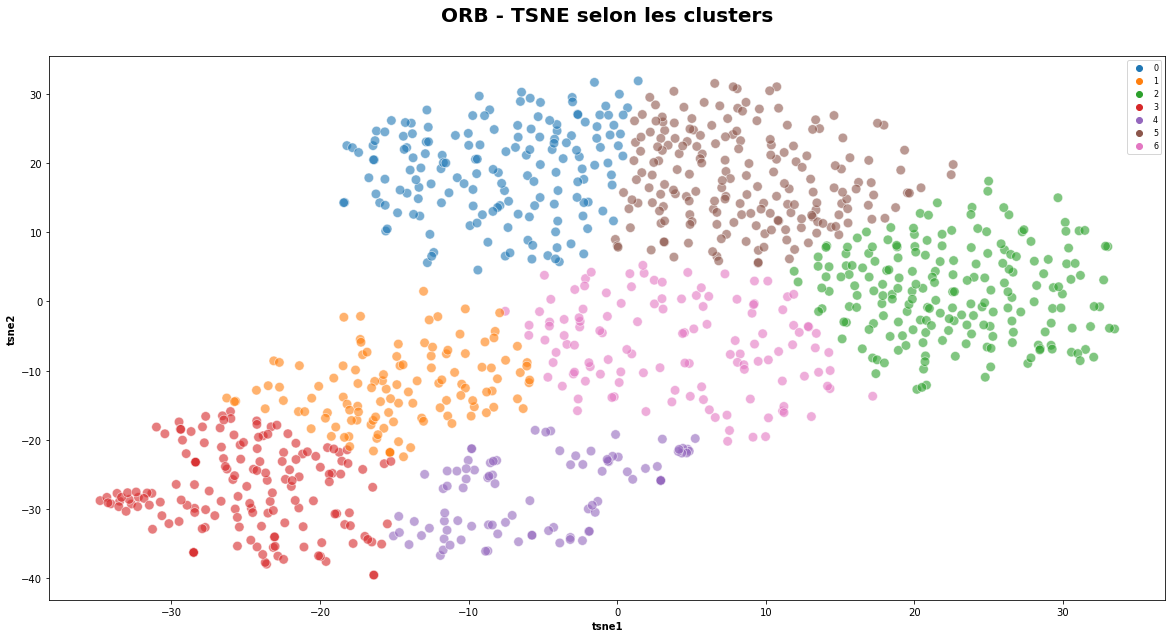

ARI :  0.0351896436567374


In [37]:
plt.figure(figsize=(20,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=90, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('ORB - TSNE selon les clusters', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 10, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 10, fontweight = 'bold')
plt.legend(prop={'size': 8}) 

plt.show()

labels = image_labels  #data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

# Pré-traitement des images via SURF :
Créations des descripteurs de chaque image Pour chaque image passage en gris et equalisation création d'une liste de descripteurs par image ("SURF_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image création d'une liste de descripteurs pour l'ensemble des images ("SURF_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [38]:
# identification of key points and associated descriptors
import time, cv2
SURF_keypoints = []
temps1=time.time()
surf = cv2.xfeatures2d.SURF_create()

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    for i in range(len(data['image'])):
        if data['image'][i]==image_num:
            image_cat=data['cat_lvl_1'][i]
            image_lab=data['label'][i]
            image_category.append(image_cat)
            image_labels.append(image_lab)
            
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = surf.detectAndCompute(res, None)
    SURF_keypoints.append(des)

SURF_keypoints_by_img = np.asarray(SURF_keypoints)
SURF_keypoints_all    = np.concatenate(SURF_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", SURF_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SURF descriptor : ", "%15.2f" % duration1, "secondes")

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1029: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


## Création des clusters de descripteurs
Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [40]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(SURF_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(SURF_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  3294
Création de 3294 clusters de descripteurs ...


C:\Users\abdel\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  "MiniBatchKMeans is known to have a memory leak on "


temps de traitement kmeans :           229.81 secondes


## Création des features des images
Pour chaque image : prédiction des numéros de cluster de chaque descripteur création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [41]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(SURF_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :           101.30 secondes


## Réductions de dimension
Réduction de dimension PCA
La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)

L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [42]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 3294)
Dimensions dataset après réduction PCA :  (1050, 782)


## Réduction de dimension T-SNE
Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [39]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = image_category # data["cat_lvl_1"]
print(df_tsne.shape)

(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images
Les catégories sont partiellement séparées

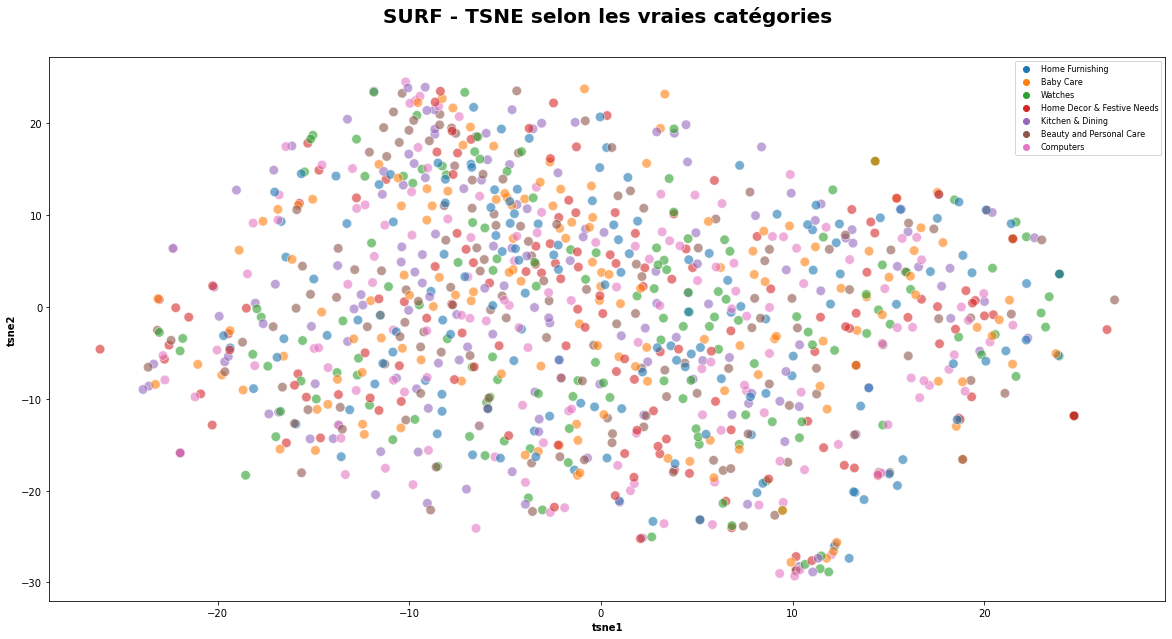

In [50]:
plt.figure(figsize=(20,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=90, alpha=0.6)

plt.title('SURF - TSNE selon les vraies catégories', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 10, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 10, fontweight = 'bold')
plt.legend(prop={'size': 8}) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters
Création de clusters à partir du T-SNE

In [51]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


### Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters


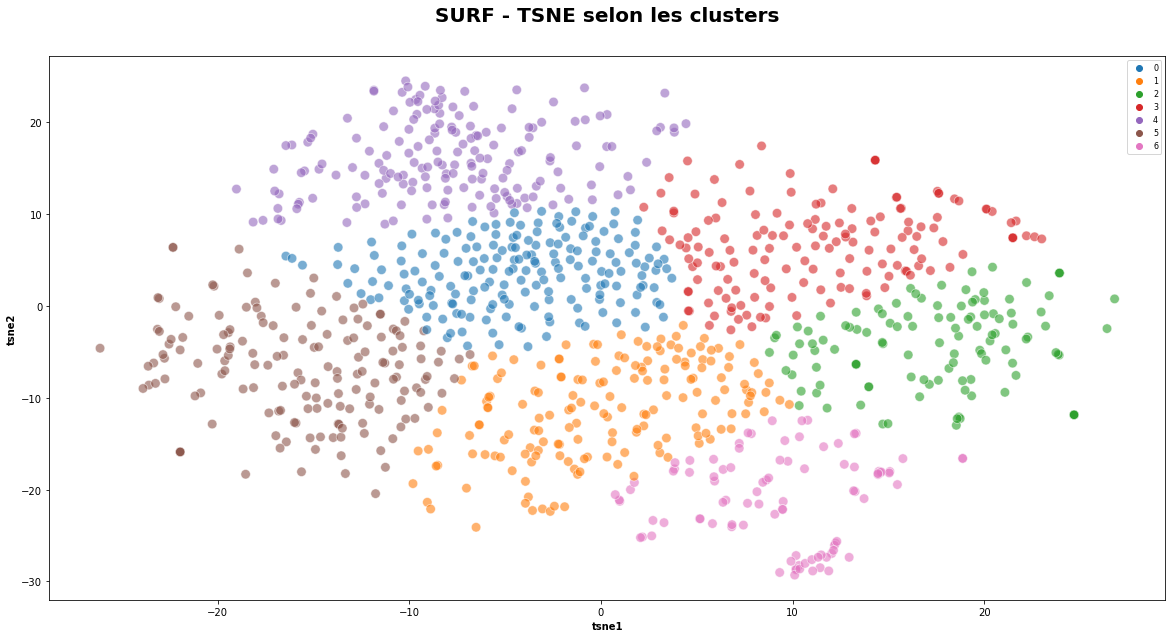

ARI :  -0.000629127910874355


In [52]:
plt.figure(figsize=(20,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=90, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('SURF - TSNE selon les clusters', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 10, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 10, fontweight = 'bold')
plt.legend(prop={'size': 8}) 

plt.show()

labels = image_labels # data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

# CNN : VGG16 (tansfert learning)

In [1]:
# importation des packages
import tensorflow as tf
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
###  import des couches 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Activation
from tensorflow.keras.models import clone_model,Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from ipywidgets import IntProgress
from ipywidgets import Text
from IPython.display import display
from IPython.display import Image
from keras.preprocessing import image

import sys

from scipy.ndimage import gaussian_filter
from PIL import Image as Image_PIL

from tensorflow.keras.applications.vgg16 import preprocess_input

Les photos devront être pré-traitées et redimensionnées avant la modélisation afin que toutes les images aient la même forme. Il s'agit souvent d'une petite image carrée.

Il existe de nombreuses façons d'y parvenir, bien que la plus courante soit une simple opération de redimensionnement qui étirera et déformera le rapport d'aspect de chaque image et la forcera dans la nouvelle forme.

Nous pourrions charger toutes les photos et examiner la répartition des largeurs et des hauteurs des photos, puis concevoir une nouvelle taille de photo qui reflète au mieux ce que nous sommes le plus susceptibles de voir dans la pratique.

Des entrées plus petites signifient un modèle plus rapide à former, et généralement cette préoccupation domine le choix de la taille de l'image. Dans ce cas, nous suivrons cette approche et choisirons une taille fixe de 224×224 pixels.

### Extraction des features avec du transfert-learning d'un CNN-VGG16

In [8]:
# utiliser le model en tant que model extracteur de features

from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
keypoints=[]
temps5=time.time()
path = "C:/Users/abdel/Downloads/Images/Images/"
image_category=[]
image_labels=[]
# define model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)    

for image_num in listdir(path):   
    image_path= path+ image_num
    # the category of image : 
    for i in range(len(data['image'])):
        if data['image'][i]==image_num:
            image_cat=data['cat_lvl_1'][i]
            image_lab=data['label'][i]
            image_category.append(image_cat)
            image_labels.append(image_lab)
    
    # load image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image) 
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get extracted features
    features = model.predict(image)
    keypoints.append(features)

keypoints = np.asarray(keypoints)
keypoints_all = np.concatenate(keypoints, axis=0)

duration5=time.time()-temps5
print("temps de création histogrammes : ", "%15.2f" % duration5, "secondes")
print("Features : ",keypoints_all.shape)

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


temps de création histogrammes :           272.59 secondes
Features :  (1050, 4096)


## Réductions de dimension

## Réduction de dimension PCA
La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)

L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [10]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", keypoints_all.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(keypoints_all)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset après réduction PCA :  (1050, 803)


## Réduction de dimension T-SNE
Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [11]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = image_category # data["cat_lvl_1"]
print(df_tsne.shape)

(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images
Les catégories sont partiellement séparées

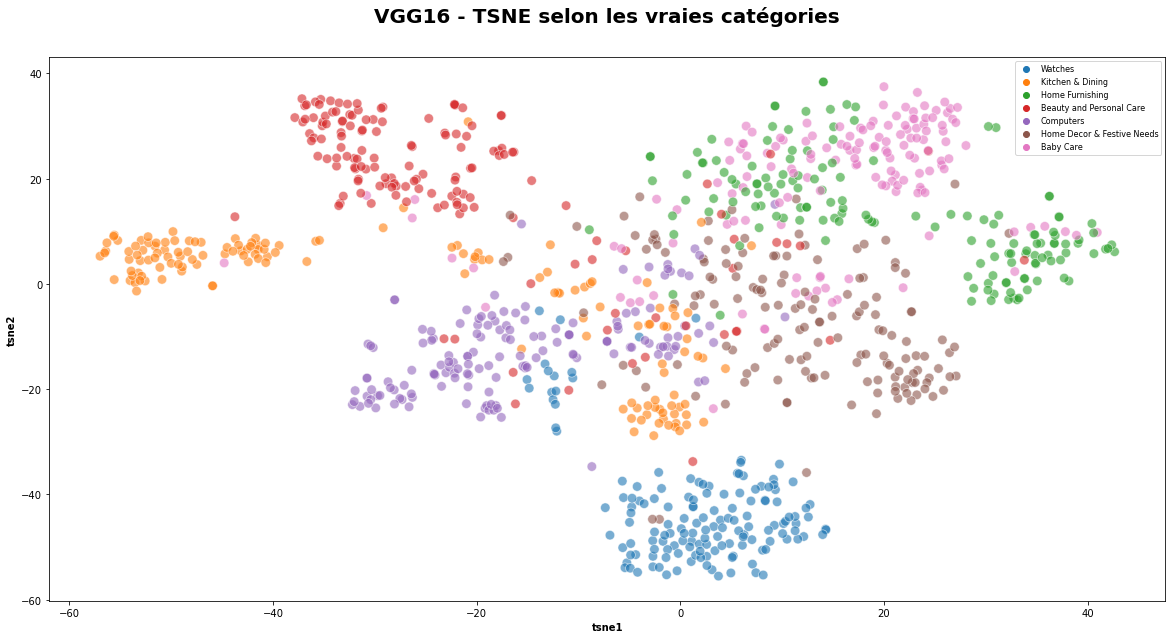

In [12]:
plt.figure(figsize=(20,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=90, alpha=0.6)

plt.title('VGG16 - TSNE selon les vraies catégories', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 10, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 10, fontweight = 'bold')
plt.legend(prop={'size': 8}) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters

### Création de clusters à partir du T-SNE

In [13]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


In [14]:
df_tsne["cluster"]

0       0
1       3
2       4
3       1
4       3
       ..
1045    6
1046    2
1047    6
1048    2
1049    3
Name: cluster, Length: 1050, dtype: int32

In [19]:
image_labels

[6,
 5,
 4,
 1,
 2,
 2,
 2,
 5,
 1,
 5,
 5,
 1,
 2,
 2,
 3,
 3,
 4,
 3,
 4,
 4,
 6,
 0,
 1,
 6,
 5,
 4,
 5,
 2,
 3,
 1,
 1,
 6,
 6,
 6,
 3,
 4,
 0,
 5,
 0,
 0,
 3,
 3,
 4,
 1,
 3,
 1,
 5,
 5,
 3,
 0,
 5,
 5,
 5,
 2,
 5,
 6,
 5,
 1,
 5,
 4,
 5,
 3,
 0,
 5,
 4,
 6,
 4,
 6,
 6,
 5,
 0,
 3,
 5,
 4,
 2,
 1,
 1,
 0,
 1,
 6,
 2,
 6,
 4,
 5,
 6,
 4,
 6,
 1,
 3,
 4,
 6,
 3,
 1,
 3,
 1,
 0,
 6,
 3,
 1,
 3,
 6,
 2,
 5,
 1,
 1,
 1,
 1,
 1,
 6,
 6,
 2,
 1,
 6,
 5,
 2,
 3,
 5,
 2,
 3,
 5,
 6,
 3,
 4,
 0,
 0,
 5,
 6,
 1,
 0,
 3,
 4,
 1,
 6,
 2,
 5,
 0,
 0,
 4,
 1,
 2,
 2,
 3,
 3,
 5,
 0,
 2,
 3,
 4,
 4,
 4,
 2,
 2,
 6,
 5,
 6,
 0,
 3,
 2,
 3,
 1,
 6,
 5,
 4,
 0,
 2,
 0,
 6,
 1,
 1,
 1,
 3,
 6,
 5,
 4,
 3,
 3,
 5,
 3,
 3,
 6,
 0,
 2,
 3,
 0,
 0,
 0,
 6,
 5,
 0,
 0,
 2,
 4,
 5,
 6,
 3,
 2,
 3,
 3,
 6,
 6,
 4,
 6,
 1,
 3,
 5,
 2,
 5,
 5,
 6,
 0,
 1,
 0,
 4,
 1,
 2,
 6,
 0,
 1,
 5,
 0,
 5,
 3,
 3,
 0,
 3,
 1,
 5,
 6,
 2,
 0,
 5,
 4,
 0,
 0,
 0,
 1,
 5,
 4,
 4,
 4,
 6,
 3,
 6,
 3,
 3,
 6,
 3,
 6,
 4,
 1,


### Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
Le score ARI de 0.00030 reste très faible

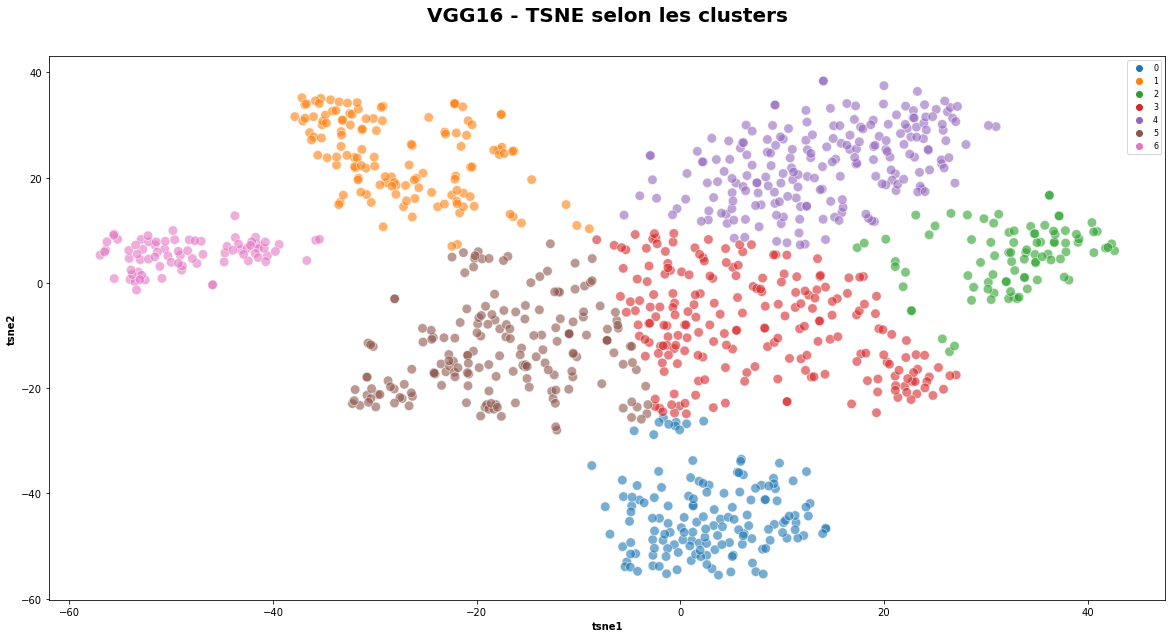

ARI :  0.472037339835839


In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=90, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('VGG16 - TSNE selon les clusters', fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 10, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 10, fontweight = 'bold')
plt.legend(prop={'size': 8}) 

plt.show()

labels = image_labels # data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

# Conclusion :



### Contenu des résultats obtenus avec SIFT/ORB/SURF/VGG16 avec tansfert learning, la faisabilité d'un moteur de classification d'articles, basé sur une image est bien réelle. on pourrait automatiser l'attribution de la catégorie de l'article. 

##### ================================================================================================================== ##

### Faisons une prédiction sur les données de test pour voir la performance de ce réseau si on l'entraine sur nos données d'entrainnement :

Le modèle est composé de deux parties principales, la partie extracteur de caractéristiques du modèle composée de blocs VGG et la partie classificateur du modèle composée de couches entièrement connectées et de la couche de sortie.

Nous pouvons utiliser la partie d'extraction de caractéristiques du modèle et ajouter une nouvelle partie de classificateur du modèle qui est adaptée à l'ensemble de nos données. Plus précisément, nous pouvons maintenir les poids de toutes les couches convolutives fixes pendant l'entrainnement, et entrainer uniquement de nouvelles couches entièrement connectées qui apprendront à interpréter les caractéristiques extraites du modèle et à effectuer une classification multi-classes (7 classes)

Ceci peut être réalisé en chargeant le modèle VGG-16, en supprimant les couches entièrement connectées de l'extrémité de sortie du modèle, puis en ajoutant les nouvelles couches entièrement connectées pour interpréter la sortie du modèle et faire une prédiction. La partie classificateur du modèle peut être supprimée automatiquement en définissant l'argument "include_top" sur "False", ce qui nécessite également que la forme de l'entrée soit également spécifiée pour le modèle, dans ce cas (224, 224, 3). Cela signifie que le modèle chargé se termine à la dernière couche de "Max Pooling", après quoi nous pouvons ajouter manuellement une couche "Flattening" et les nouvelles couches de classification.

Nous pouvons utiliser l'API de la fonction Keras pour ajouter une nouvelle couche Flatten après la dernière couche de regroupement dans le modèle VGG16, puis définir un nouveau modèle de classificateur avec une couche Dense entièrement connectée et une couche de sortie qui prédira la probabilité pour 7 classes.

# Création de la structure du répertoire :

Nous pouvons créer des répertoires en Python en utilisant la fonction makedirs() et utiliser une boucle pour créer les 7 sous-répertoires

In [13]:
# create directories
dataset_home = 'C:/Users/abdel/OneDrive/Bureau/OPENCLASSROOMS/Formation Data Scientist/Projet_6_Classifiez automatiquement des biens de consommation/Projet_Karim/dataset_home/'
subdirs = ['train/', 'test/','validation/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['Beauty and Personal Care/', 'Baby Care/',
                 'Home Furnishing/', 'Watches/',
                 'Home Decor & Festive Needs/', 'Computers/', 
                 'Kitchen & Dining/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

Ensuite, nous pouvons énumérer tous les fichiers image du jeu de données et les copier dans le sous-répertoire en fonction de leur catégorie en les répartissant de la façon suivante : 

80% pour le training

10% pour la validation

10% pour le test

In [14]:
import shutil
nbr_file_class_1=0
nbr_file_class_2=0
nbr_file_class_3=0
nbr_file_class_4=0
nbr_file_class_5=0
nbr_file_class_6=0
nbr_file_class_7=0

# seed random number generator
random.seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.20
# copy training dataset images into subdirectories
path = "C:/Users/abdel/Downloads/Images/Images/"
for file in listdir(path):   
    src = path + '/' + file
    #if data['image']==file:
    index_image= data[data['image']==file].index.tolist()
    class_image=data['cat_lvl_1'][index_image[0]] 
    if class_image.startswith('Beauty and Personal Care'):
        nbr_file_class_1=nbr_file_class_1+1
        ratio=nbr_file_class_1/150
        if ratio <=(val_ratio/2) :
            dst = dataset_home + '/' + 'test/' + 'Beauty and Personal Care/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio/2) and  ratio <=(val_ratio) :
            dst = dataset_home + '/' + 'validation/' + 'Beauty and Personal Care/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio)  :
            dst = dataset_home + '/' + 'train/' + 'Beauty and Personal Care/' + file
            shutil.copyfile(src, dst)
    elif class_image.startswith('Baby Care'):
        nbr_file_class_2=nbr_file_class_2+1
        ratio=nbr_file_class_2/150
        if ratio <=(val_ratio/2) :
            dst = dataset_home + '/' + 'test/' + 'Baby Care/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio/2) and  ratio <=(val_ratio) :
            dst = dataset_home + '/' + 'validation/' + 'Baby Care/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio) :
            dst = dataset_home + '/' + 'train/' + 'Baby Care/' + file
            shutil.copyfile(src, dst)
    elif class_image.startswith('Home Furnishing'):
        nbr_file_class_3=nbr_file_class_3+1
        ratio=nbr_file_class_3/150
        if ratio <=(val_ratio/2) :
            dst = dataset_home + '/' + 'test/' + 'Home Furnishing/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio/2) and  ratio <=(val_ratio) :
            dst = dataset_home + '/' + 'validation/' + 'Home Furnishing/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio/2) :
            dst = dataset_home + '/' + 'train/'+ 'Home Furnishing/' + file
            shutil.copyfile(src, dst)
    elif class_image.startswith('Watches'):
        nbr_file_class_4=nbr_file_class_4+1
        ratio=nbr_file_class_4/150
        if ratio <=(val_ratio/2) :
            dst = dataset_home + '/' + 'test/' + 'Watches/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio/2) and  ratio <=(val_ratio) :
            dst = dataset_home + '/' + 'validation/' + 'Watches/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio/2) :
            dst = dataset_home + '/' + 'train/' + 'Watches/' + file
            shutil.copyfile(src, dst)
    elif class_image.startswith('Home Decor & Festive Needs'):
        nbr_file_class_5=nbr_file_class_5+1
        ratio=nbr_file_class_5/150
        if ratio <=(val_ratio/2) :
            dst = dataset_home + '/' + 'test/'+ 'Home Decor & Festive Needs/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio/2) and  ratio <=(val_ratio) :
            dst = dataset_home + '/' + 'validation/' + 'Home Decor & Festive Needs/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio/2) :
            dst = dataset_home + '/' + 'train/' + 'Home Decor & Festive Needs/' + file
            shutil.copyfile(src, dst)
    elif class_image.startswith('Computers'):
        nbr_file_class_6=nbr_file_class_6+1
        ratio=nbr_file_class_6/150
        if ratio <=(val_ratio/2) :
            dst = dataset_home + '/' + 'test/' + 'Computers/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio/2) and  ratio <=(val_ratio) :
            dst = dataset_home + '/' + 'validation/' + 'Computers/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio/2) :
            dst = dataset_home + '/' + 'train/' + 'Computers/' + file
            shutil.copyfile(src, dst)
    elif class_image.startswith('Kitchen & Dining'):
        nbr_file_class_7=nbr_file_class_7+1
        ratio=nbr_file_class_7/150
        if ratio <=(val_ratio/2) :
            dst = dataset_home + '/' + 'test/' + 'Kitchen & Dining/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio/2) and  ratio <=(val_ratio) :
            dst = dataset_home + '/' + 'validation/' + 'Kitchen & Dining/' + file
            shutil.copyfile(src, dst)
        elif ratio >(val_ratio/2) :
            dst = dataset_home + '/' + 'train/' + 'Kitchen & Dining/' + file
            shutil.copyfile(src, dst)

In [11]:
# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(1024, activation='relu')(flat1)
    output = Dense(7, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.input, outputs=output)
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)   # 
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Une fois créé, nous pouvons former le modèle sur le jeu de données d'entrainnement "Train_set".

Peu d'entrainnement sera nécessaire dans ce cas, car seule la nouvelle couche entièrement connectée et de sortie ont des poids pouvant être calculés. Par conséquent, nous fixerons le nombre d'épochs d'entraînement à 8.

Le modèle VGG16 a été entrainé sur un ensemble de données spécifique. il est configuré pour que les images d'entrée attendues aient la forme 224 × 224 pixels. Nous l'utiliserons comme taille cible lors du chargement de photos à partir de l'ensemble de données.

Le modèle s'attend également à ce que les images soient centrées. Keras fournit une fonction pour effectuer cette préparation pour des photos individuelles via la fonction preprocess_input(). Néanmoins, nous pouvons obtenir le même effet avec ImageDataGenerator en définissant l'argument "featurewise_center" sur "True" et en spécifiant manuellement les valeurs moyennes des pixels à utiliser lors du centrage comme valeurs moyennes de l'ensemble de données d'apprentissage ImageNet : [123.68, 116.779, 103.939] .



Found 840 images belonging to 7 classes.
Found 105 images belonging to 7 classes.
Found 105 images belonging to 7 classes.


C:\Users\abdel\AppData\Local\Temp/ipykernel_48672/481532740.py:38: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


Epoch 1/8
 3/14 [=====>........................] - ETA: 2:22 - loss: 22.7715 - accuracy: 0.3646

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


14/14 [==============================] - 215s 15s/step - loss: 19.3809 - accuracy: 0.5940 - val_loss: 13.7632 - val_accuracy: 0.6762
Epoch 2/8
14/14 [==============================] - 206s 15s/step - loss: 2.4589 - accuracy: 0.8905 - val_loss: 5.7949 - val_accuracy: 0.7619
Epoch 3/8
14/14 [==============================] - 207s 15s/step - loss: 0.3492 - accuracy: 0.9619 - val_loss: 3.0153 - val_accuracy: 0.7905
Epoch 4/8
14/14 [==============================] - 205s 15s/step - loss: 0.0776 - accuracy: 0.9881 - val_loss: 2.7351 - val_accuracy: 0.7905
Epoch 5/8
14/14 [==============================] - 205s 14s/step - loss: 2.1966e-04 - accuracy: 1.0000 - val_loss: 2.8657 - val_accuracy: 0.8000
Epoch 6/8
14/14 [==============================] - 205s 14s/step - loss: 6.3563e-04 - accuracy: 1.0000 - val_loss: 2.9160 - val_accuracy: 0.8000
Epoch 7/8
14/14 [==============================] - 207s 15s/step - loss: 5.7985e-05 - accuracy: 1.0000 - val_loss: 2.9184 - val_accuracy: 0.8000
Epoch 8/8

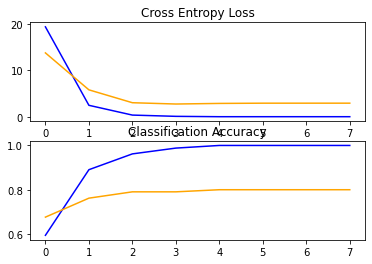

In [13]:
dataset_home = 'C:/Users/abdel/OneDrive/Bureau/OPENCLASSROOMS/Formation Data Scientist/Projet_6_Classifiez automatiquement des biens de consommation/Projet_Karim/dataset_home/'

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(dataset_home +'train/',
        class_mode='categorical', batch_size=64, target_size=(224, 224))
    
    validation_it = datagen.flow_from_directory(dataset_home +'validation/',
        class_mode='categorical', batch_size=64, target_size=(224, 224))
    
    test_it = datagen.flow_from_directory(dataset_home +'test/',
        class_mode='categorical', batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
                                  validation_data=validation_it, validation_steps=len(validation_it), epochs=8, verbose=1)
    # save model
    model.save('transfert_learning_model.H5')
    
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    
# entry point, run the test harness
run_test_harness()

In [14]:
# utiliser le model pour prédire les catégories des images

from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
keypoints=[]
temps5=time.time()
path = "C:/Users/abdel/Downloads/Images/Images/"

# define model
model = define_model()
    
for image_num in listdir(path):   
    image_path= path+ image_num
    # load image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image) 
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # get extracted features
    features = model.predict(image)
    keypoints.append(np.argmax(features))

keypoints_by_image = np.asarray(keypoints)
#keypoints_all    = np.concatenate(keypoints_by_img, axis=0)

duration5=time.time()-temps5
print("temps de création histogrammes : ", "%15.2f" % duration5, "secondes")
#print("im_features : ",keypoints.shape)

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


temps de création histogrammes :           324.96 secondes


In [22]:
keypoints

[3,
 5,
 2,
 5,
 5,
 2,
 5,
 6,
 4,
 5,
 5,
 6,
 5,
 5,
 2,
 5,
 5,
 4,
 4,
 6,
 6,
 5,
 6,
 5,
 6,
 5,
 4,
 5,
 1,
 6,
 5,
 6,
 3,
 4,
 2,
 2,
 4,
 4,
 6,
 2,
 1,
 5,
 4,
 5,
 4,
 4,
 5,
 5,
 5,
 6,
 4,
 6,
 4,
 6,
 5,
 5,
 2,
 5,
 4,
 5,
 5,
 0,
 1,
 5,
 5,
 5,
 1,
 5,
 4,
 5,
 4,
 2,
 1,
 2,
 5,
 5,
 2,
 2,
 5,
 4,
 1,
 5,
 2,
 6,
 4,
 5,
 4,
 6,
 0,
 5,
 5,
 4,
 5,
 5,
 2,
 5,
 6,
 5,
 2,
 2,
 6,
 1,
 2,
 4,
 6,
 4,
 5,
 1,
 4,
 5,
 4,
 2,
 5,
 2,
 5,
 6,
 5,
 6,
 1,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 0,
 5,
 1,
 5,
 2,
 5,
 4,
 6,
 5,
 2,
 2,
 6,
 5,
 4,
 5,
 4,
 0,
 2,
 1,
 1,
 5,
 1,
 2,
 0,
 6,
 5,
 5,
 2,
 6,
 6,
 1,
 6,
 2,
 4,
 1,
 5,
 2,
 5,
 5,
 1,
 1,
 6,
 5,
 5,
 2,
 1,
 4,
 0,
 2,
 2,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 4,
 5,
 2,
 0,
 6,
 5,
 4,
 1,
 2,
 5,
 5,
 2,
 5,
 2,
 1,
 4,
 5,
 6,
 6,
 6,
 4,
 4,
 2,
 5,
 2,
 5,
 2,
 5,
 2,
 0,
 5,
 1,
 4,
 2,
 5,
 2,
 5,
 2,
 1,
 1,
 6,
 1,
 5,
 6,
 6,
 1,
 0,
 5,
 5,
 4,
 4,
 5,
 5,
 3,
 6,
 5,
 5,
 5,
 2,
 6,
 5,
 3,
 6,
 2,
 5,
 0,
 1,


# Fin du projet